In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


body_df = pd.read_csv('/home/mremington/Documents/therma_sim/therma_sim/Empirical_Data/Viridis_Body_Size_Main_data.csv')
body_df.columns = ['Study_Site', 'Date_Captured', 'snake_id', 'Spceies', 'Lat', 'Long', 'sex', 'reproductive_status', 'Age', 'Mass', 'SVL', 'Tail_Length'] 
body_df.head()

,Study_Site,Date_Captured,snake_id,Spceies,Lat,Long,sex,reproductive_status,Age,Mass,SVL,Tail_Length
0,Nebraska,4/22/22,NVCRVI030,crvi,42.801574,-100.126701,M,NaN,A,902.0,1025.0,71.0
1,Nebraska,5/13/22,NVCRVI032,crvi,42.800442,-100.127177,F,NaN,A,303.0,837.0,48.0
2,Nebraska,5/13/22,NVCRVI019,crvi,42.796125,-100.120898,M,NaN,A,241.0,705.0,55.0
3,Nebraska,5/13/22,NVCRVI001,crvi,42.792142,-100.131582,M,NaN,A,614.0,915.0,78.0
4,Nebraska,10/16/2021,NVCRVI014,crvi,42.801674,-100.126043,M,NaN,A,675.0,882.0,75.0


In [18]:
print(adults_df['Study_Site'].unique())


['Nebraska' 'Texas' 'Canada']


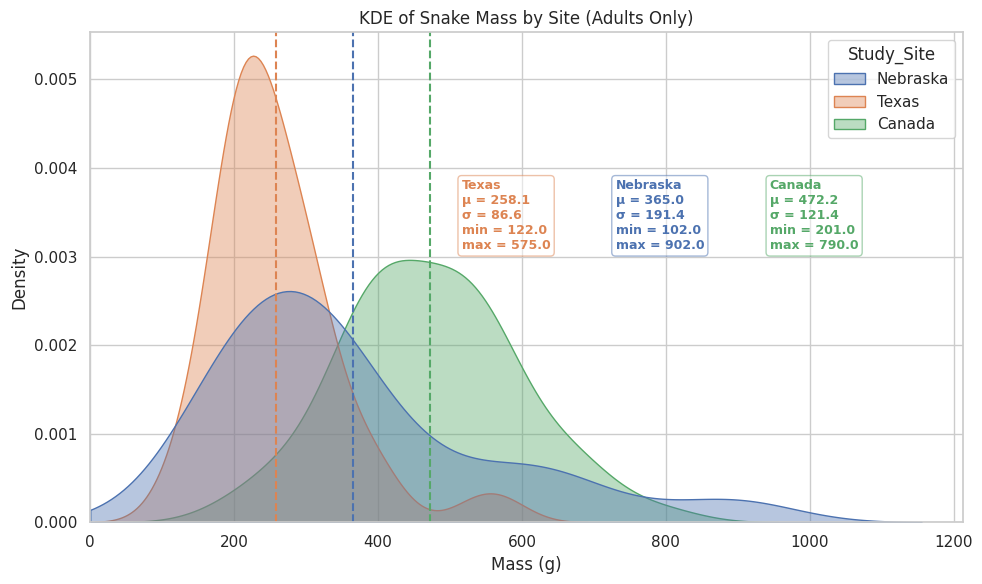

In [40]:
# Filter to adults only
adults_df = body_df[body_df['Age'] == 'A']


adults_df = adults_df.dropna(subset=['Mass', 'SVL'])



sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.kdeplot(
    data=adults_df,
    x='Mass',
    hue='Study_Site',
    fill=True,
    common_norm=False,
    alpha=0.4,
    clip=(0, None)  # Truncate to avoid negatives
)

sites = adults_df['Study_Site'].unique()
colors = sns.color_palette(n_colors=len(sites))

for site, color in zip(sites, colors):
    site_data = adults_df[adults_df['Study_Site'] == site]['Mass'].dropna()
    mean = site_data.mean()
    std = site_data.std()
    min_val = site_data.min()
    max_val = site_data.max()

    # Mean line
    ax.axvline(mean, color=color, linestyle='--', linewidth=1.5)

    # Optional: Shade ±1 std
    # ax.fill_betweenx([0, ax.get_ylim()[1]], mean - std, mean + std, color=color, alpha=0.1)

    # Annotate mean ± std
    stats_text = (
    f"{site}\n"
    f"μ = {mean:.1f}\n"
    f"σ = {std:.1f}\n"
    f"min = {min_val:.1f}\n"
    f"max = {max_val:.1f}"
    )

    # Adjust this x/y placement manually to fit white space
    ax.text(
        mean * 2,                 # x-position (play with this)
        ax.get_ylim()[1] * 0.7,     # y-position (play with this)
        stats_text,
        color=color,
        ha='left',
        va='top',
        fontsize=9,
        fontweight='bold',
        bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3', alpha=0.5)
    )

# Final plot formatting
plt.title('KDE of Snake Mass by Site (Adults Only)')
plt.xlabel('Mass (g)')
plt.ylabel('Density')
plt.xlim(left=0)  # Prevent negative values entirely
plt.tight_layout()
plt.savefig(
    "/home/mremington/Documents/therma_sim/therma_sim/src/therma_sim/Results/Figures/snake_mass_kde_with_stats.png",
    dpi=300,
    bbox_inches='tight'
)
